In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as Image
import collections
import cv2
import matplotlib as mpl

**PART 1: HISTOGRAM OF COLOURED IMAGE**

In [0]:
# To calculate histogram for each color channel
def readColourImage(colour,nBin, doBinning):
    image_1D = sorted(colour.ravel())
    counter=collections.Counter(image_1D)
    hist_list = list(counter.keys())
    freq_list = list(counter.values())
    
    if doBinning:
        intensityBins = [hist_list[i:i+nBin] for i in range(0,len(hist_list),nBin)]
        frequencyBins = [freq_list[i:i+nBin] for i in range(0,len(freq_list),nBin)]
        hist_with_bins = []
        freq_with_bins = []
        for i in intensityBins:
            frequencySum = 0
            hist_with_bins.append(i[len(i) - 1])
            for x in i:
                frequencySum += counter[x]
            freq_with_bins.append(frequencySum)
    else:
        hist_with_bins = hist_list
        freq_with_bins = freq_list
        
#     print(hist_with_bins, freq_with_bins)
    return hist_with_bins, freq_with_bins

In [0]:
def displayHistogram(hist_list,freq_list):
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.title('Histogram of image')
    plt.bar(hist_list,freq_list)
    plt.show()
     

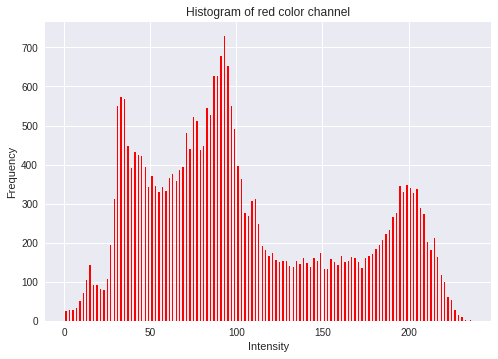

In [106]:
#RED
img_raw = Image.imread('b1.png',0)
red = img_raw[:,:,0]
hist_list, freq_list = readColourImage(red,nBin=2,doBinning=True)
plt.bar(hist_list,freq_list,color = 'r')
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.title('Histogram of red color channel')
plt.show()

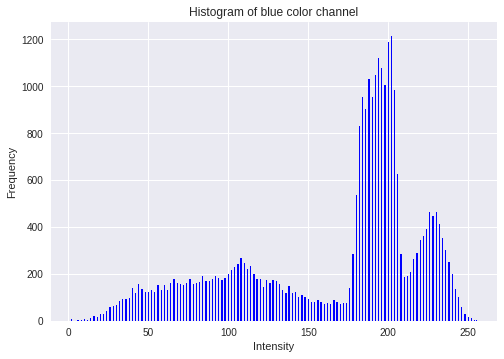

In [107]:
#BLUE
img_raw = Image.imread('b1.png',0)
blue = img_raw[:,:,2]
hist_list, freq_list = readColourImage(blue,nBin=2,doBinning=True)
plt.bar(hist_list,freq_list,color = 'b')
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.title('Histogram of blue color channel')
plt.show()


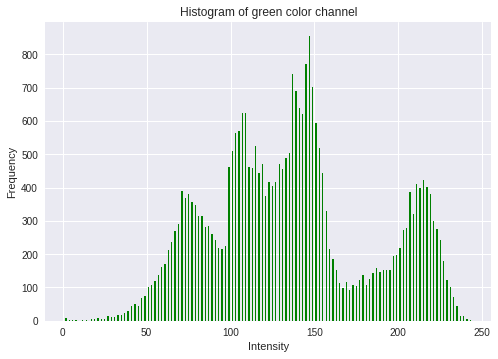

In [108]:
#GREEN
img_raw = Image.imread('b1.png',0)
blue = img_raw[:,:,1]
hist_list, freq_list = readColourImage(blue,nBin=2,doBinning=True)
plt.bar(hist_list,freq_list,color = 'g')
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.title('Histogram of green color channel')
plt.show()

In [0]:
def RGB_to_GRAY(rgb):
    return np.dot(rgb[...,:3], [0.30, 0.59, 0.11])


def readImage(image_url,nBin, doBinning):
    img_raw = Image.imread(image_url,0) 
    gray_img = RGB_to_GRAY(img_raw)
    
    plt.title("Orignal image")
    plt.imshow(gray_img, cmap = plt.get_cmap('gray'))
    plt.xticks([]), plt.yticks([])
    plt.show()
    
   
    image_1D = sorted(gray_img.ravel())
    counter=collections.Counter(image_1D)
#     print(len(counter))
    hist_list = list(counter.keys())
    freq_list = list(counter.values())
    
    if doBinning:
        intensityBins = [hist_list[i:i+nBin] for i in range(0,len(hist_list),nBin)]
        frequencyBins = [freq_list[i:i+nBin] for i in range(0,len(freq_list),nBin)]
        hist_bins = []
        freq_bins = []
        for i in intensityBins:
            frequencySum = 0
            hist_bins.append(i[len(i) - 1])
            for x in i:
                frequencySum += counter[x]
            freq_bins.append(frequencySum)
    else:
        hist_bins = hist_list
        freq_bins = freq_list
        
#     print(hist_with_bins, freq_with_bins)
    return hist_bins, freq_bins, gray_img



def readImage_Array(image_1D,nBin, doBinning):
#     print(len(set(image_1D)))

    image_1D = sorted(image_1D.ravel()) 
#     image_1D = [int(round(i)) for i in image_1D]
    counter=collections.Counter(image_1D)
#     print(len(counter))
    hist_list = list(counter.keys())
    freq_list = list(counter.values())
    
    if doBinning:
        intensityBins = [hist_list[i:i+nBin] for i in range(0,len(hist_list),nBin)]
        frequencyBins = [freq_list[i:i+nBin] for i in range(0,len(freq_list),nBin)]
        hist_bins = []
        freq_bins = []
        for i in intensityBins:
            frequencySum = 0
            hist_bins.append(i[len(i) - 1])
            for x in i:
                frequencySum += counter[x]
            freq_bins.append(frequencySum)
    else:
        hist_bins = hist_list
        freq_bins = freq_list
        
#     print(hist_with_bins, freq_with_bins)
    return hist_bins, freq_bins

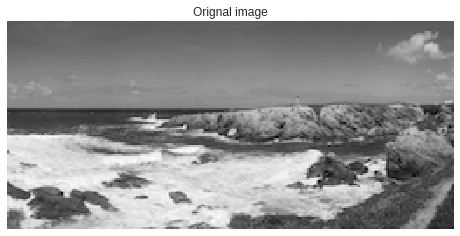

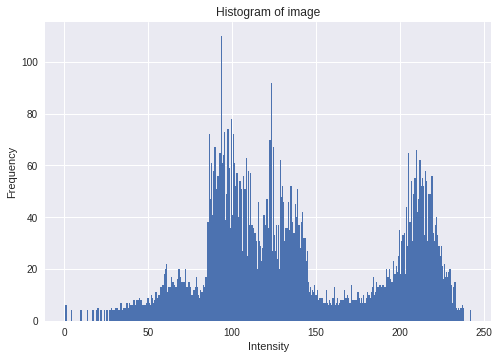

In [110]:
#Grayscale image and histogram


hist_list, freq_list,_ = readImage('b1.png',nBin=4,doBinning=True)
displayHistogram(hist_list,freq_list)

**PDF OF THE IMAGE**

In [0]:
#PDF of image

def plotPDF(freq_list):
    size = sum(freq_list)
    pdf_image =[]
    pdf_image = [x / size for x in freq_list]
    return pdf_image

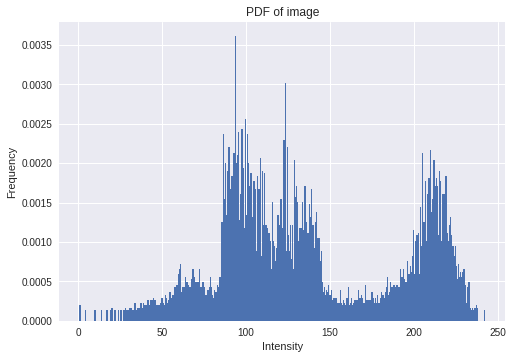

In [112]:
pdf_image = plotPDF(freq_list)
plt.title('PDF of image')
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.bar(hist_list,pdf_image)
plt.show()

**CDF OF THE IMAGE**

In [0]:
#CDf of the image

def plotCDF(pdf_image):
    cdf_list = list()
    tempSum = 0
    for idx, freq in enumerate(pdf_image):
        tempSum += freq
#         cdfMap[intensities[idx]] = tempSum
        cdf_list.append(tempSum)
    return(cdf_list)

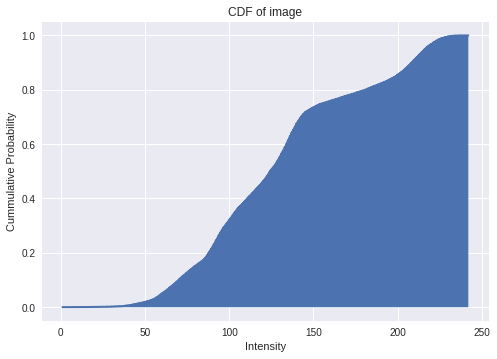

In [115]:
cdf_image = plotCDF(pdf_image)
plt.title('CDF of image')
plt.xlabel("Intensity")
plt.ylabel("Cummulative Probability")
plt.step(hist_list,cdf_image)
plt.fill_between(hist_list,cdf_image)
plt.show()

**HISTOGRAM EQUALIZATION**

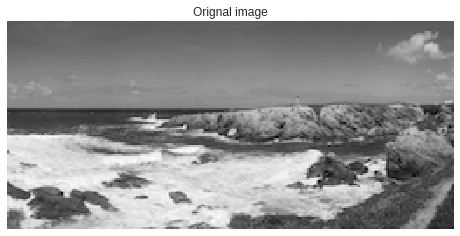

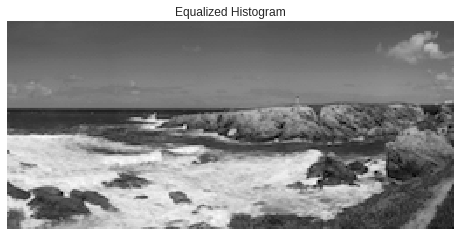

In [116]:
#Histogram Equalization

hist_list,freq_list,gray_img_equ = readImage('b1.png',nBin=4,doBinning=True)
#print(gray_img_equ)
plt.xticks([]), plt.yticks([])
#print(len(cdf_list))

def hist_Equalisation(cdf_image):
    cdf_image = [i*255/cdf_image[-1] for i in cdf_image]
    image_equalized = np.interp(gray_img_equ, range(0,2670), cdf_image)
#     print(len(cdf_image))
    return image_equalized
    
    
image_equalized = hist_Equalisation(cdf_image)
#print(image_equalized)

plt.imshow(image_equalized, cmap = 'gray')
plt.title('Equalized Histogram')
plt.xticks([]), plt.yticks([])

#plt.title('Histogram Equalization')
plt.show()
Image.imsave('EqualizedImage.png',image_equalized)

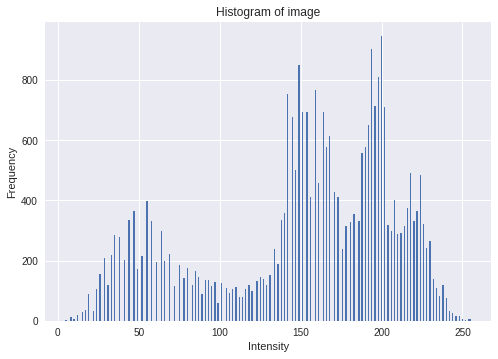

In [118]:
#Histogram of equalized image

def readImage2(image_url,nBin, doBinning):
    img_raw = Image.imread(image_url,0) 
    gray_img = RGB_to_GRAY(img_raw)
    
    #plt.title("Orignal image")
    #plt.imshow(gray_img, cmap = plt.get_cmap('gray'))
    #plt.show()
    
    image_1D = sorted(gray_img.ravel())
    counter=collections.Counter(image_1D)
#     print(len(counter))
    hist_list = list(counter.keys())
    freq_list = list(counter.values())
    
    if doBinning:
        intensityBins = [hist_list[i:i+nBin] for i in range(0,len(hist_list),nBin)]
        frequencyBins = [freq_list[i:i+nBin] for i in range(0,len(freq_list),nBin)]
        hist_with_bins = []
        freq_with_bins = []
        for i in intensityBins:
            frequencySum = 0
            hist_with_bins.append(i[len(i) - 1])
            for x in i:
                frequencySum += counter[x]
            freq_with_bins.append(frequencySum)
    else:
        hist_with_bins = hist_list
        freq_with_bins = freq_list
        
#     print(hist_with_bins, freq_with_bins)
    return hist_with_bins, freq_with_bins, gray_img



hist_list, freq_list,_ = readImage2('EqualizedImage.png',nBin=2,doBinning=True)
displayHistogram(hist_list,freq_list)

**PART 2: BINARY IMAGE - MANUAL THRESHOLDING**

In [0]:
#Manual Thresholding:

def thresholding(arr):
    for i in arr:
      for j in i:
        if(j[0] > 123):
            j[0]=j[1]=j[2] = 255
            #print(arr)
        else:
             j[0]=j[1]=j[2] = 0
    #print(arr)
    plt.imshow(arr)
    plt.show()

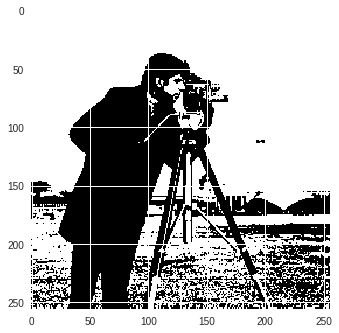

In [142]:
#Binary image using Manual Thresholding 

img_raw1 = cv2.imread('b2_a.png') 
thresholding(img_raw1)

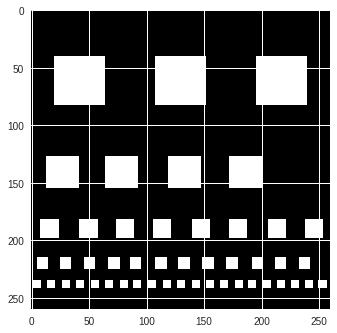

In [125]:
#Binary image using Manual Thresholding 

img_raw2 = cv2.imread('b2_b.png') 
thresholding(img_raw2)

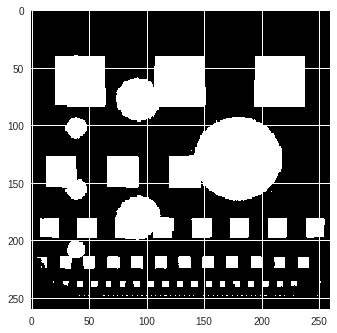

In [126]:
#Binary image using Manual Thresholding 

img_raw3 = cv2.imread('b2_c.png') 
thresholding(img_raw3)

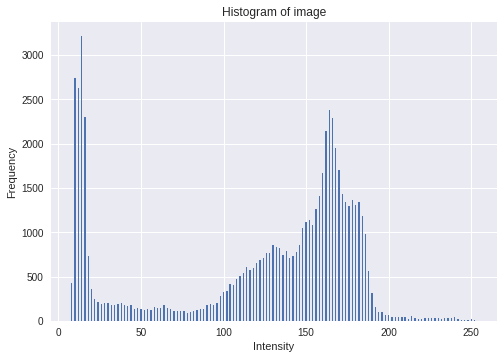

In [0]:
#Histogram of each image

imageb2_a = Image.imread('b2_a.png',0)
hist_list, freq_list = readColourImage(imageb2_a,nBin=2,doBinning=True)
displayHistogram(hist_list,freq_list)

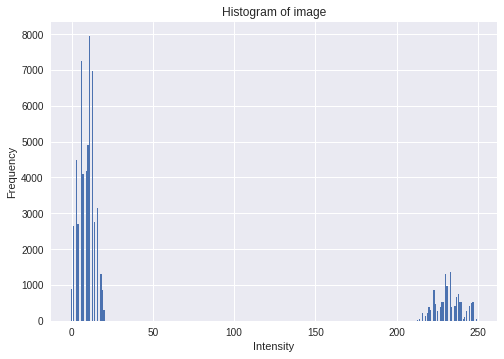

In [0]:
#Histogram of b2_b.png image

imageb2_b = Image.imread('b2_b.png',0)
hist_list, freq_list = readColourImage(imageb2_b,nBin=1,doBinning=False)
displayHistogram(hist_list,freq_list)

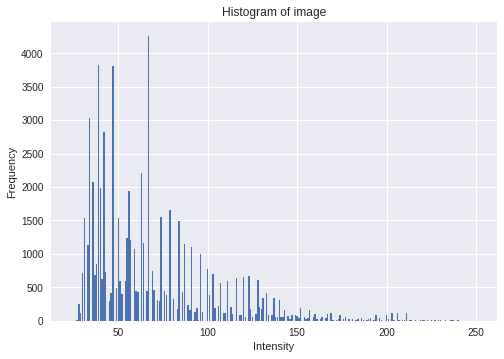

In [0]:
#Histogram of b2_c.png image

imageb2_c = Image.imread('b2_c.png',0)
hist_list, freq_list = readColourImage(imageb2_c,nBin=4,doBinning=False)
displayHistogram(hist_list,freq_list)

In [0]:
OTSU ALGORITHM FOR BINARY IMAGES

In [0]:
#OTSU Algorithm

def otsu(gray):
    #pixel_number = len(gray) * len(gray)
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weigth = 1.0/pixel_number
    his, bins = np.histogram(gray, np.arange(0,257))
    final_thresh = -1
    final_value = -1
    
    variance = []
    threshold = []
    
    intensity_arr = np.arange(256)
    for t in bins[1:-1]: 
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        #print(his[t:])
        Wb = pcb * mean_weigth
        Wf = pcf * mean_weigth

        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
        
        #print(mub, muf ,Wb, Wf)
        value = Wb * Wf * (mub - muf) ** 2
        #print(value)
        
        #print(value)
        if value > final_value:
            final_thresh = t
            threshold.append(final_thresh)
            #print(final_thresh)
            final_value = value
            variance.append(final_value)
    #To show a plot of the inter-class variance  
   
    plt.bar(threshold, variance)
    plt.title('Plot of the inter-class variance')
    plt.xlabel("Threshold")
    plt.ylabel("Variance")
    plt.show()
    final_img = gray.copy()
    print(final_thresh)
    print(final_value)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


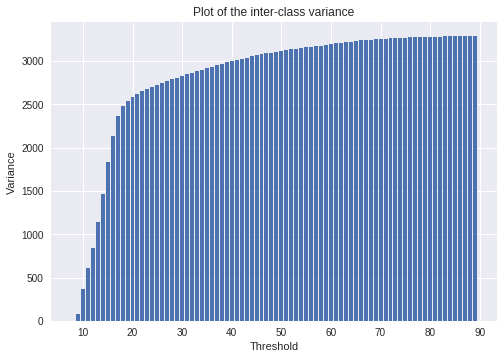

89
3289.115897971246


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

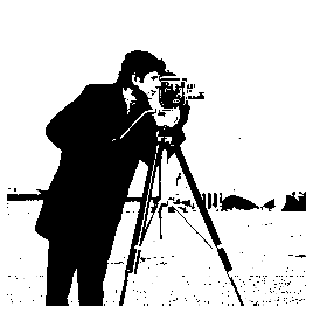

In [136]:
gray1 = Image.imread('b2_a.png',0)
array1 = gray1.ravel()
image = otsu(gray1)
#Image.imsave('binaryb2_a.png',image_equalized)
#print(image)
plt.imshow(image)
plt.xticks([]), plt.yticks([])

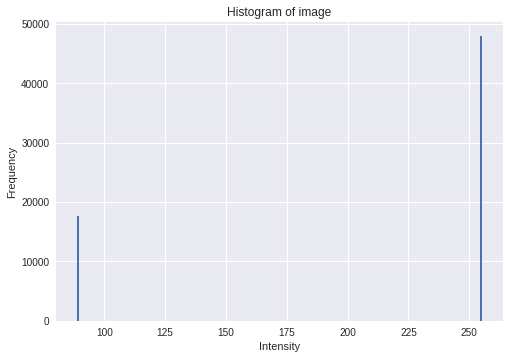

In [0]:
#Histogram of binary image

hist_list, freq_list = readImage_Array(image,nBin=2,doBinning=True)
displayHistogram(hist_list, freq_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


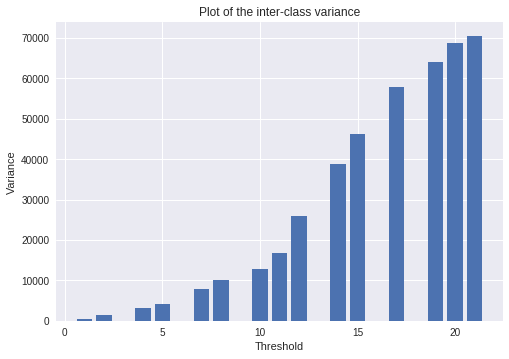

21
70505.13531338015
(260, 260, 3)


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

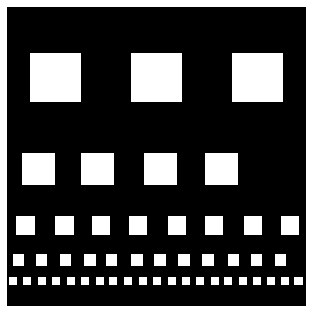

In [138]:
#2nd image

gray2 = cv2.imread('b2_b.png')
image1 = otsu(gray2)
print(image1.shape)
plt.imshow(image1)
plt.xticks([]), plt.yticks([])

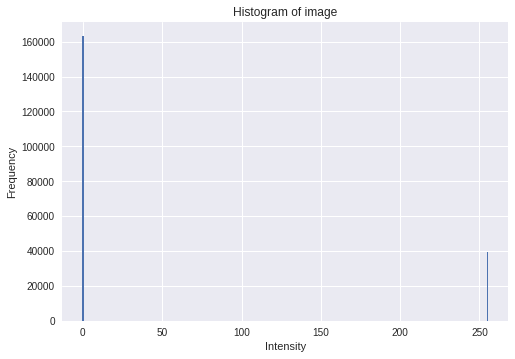

In [139]:
#Histogram of binary image

hist_list, freq_list = readImage_Array(image1,nBin=4,doBinning=False)
displayHistogram(hist_list, freq_list)
#image1 = image1.ravel()
#plt.hist(image1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


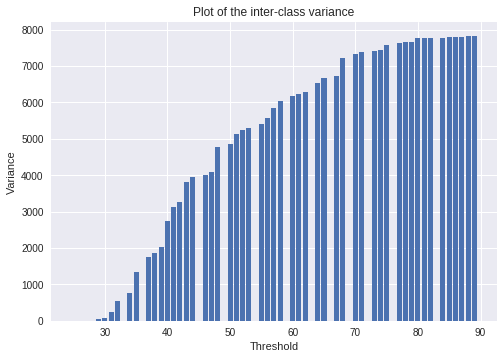

89
7821.798527584785
(260, 260, 3)


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

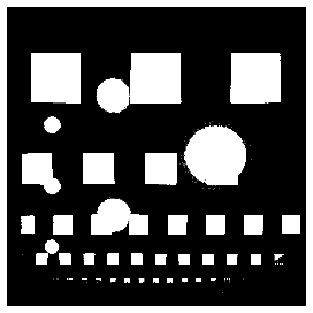

In [140]:
gray3 = cv2.imread('b2_c.png')
image3 = otsu(gray3)
print(image3.shape)
plt.imshow(image3)
plt.xticks([]), plt.yticks([])

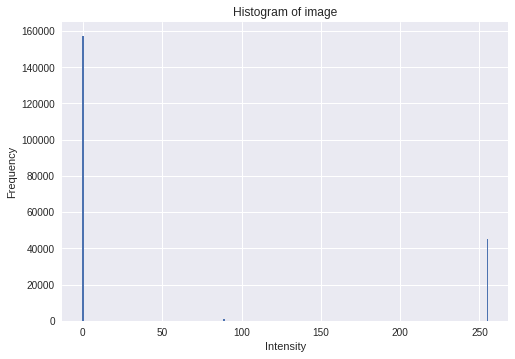

In [0]:
#Histogram of binary image

hist_list, freq_list = readImage_Array(image3,nBin=3,doBinning=False)
displayHistogram(hist_list, freq_list)
#image3 = image3.ravel()
#plt.hist(image3)
#plt.show()